# dataset/custom/AIRS

review of the AIRS dataset.

In [1]:
from blueflow import notebooks

import os
import numpy as np

from blue_objects import file, objects
from blue_options import string

from roofAI import env
from roofAI.host import signature
from roofAI.semseg.utils import visualize
from roofAI.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🏛️  roofAI-5.52.1.abcli-9.464.1.blue_objects-5.225.1.blue_options-4.187.1.torch-2.5.1.Python 3.9.6.Darwin 23.6.0..Jupyter-Notebook,
built on 13 January 2025, 18:14:32


In [ ]:
# roofAI dataset ingest source=AIRS
cache_object_name = env.ROOFAI_AIRS_CACHE_OBJECT_NAME

subset = "test"
index = 10

In [3]:
cache_object_path = objects.object_path(cache_object_name)

In [4]:
! ls {cache_object_path}

aerialimageryforroofsegmentation.zip train.txt
test                                 val
train                                val.txt


In [5]:
record_id = file.name(file.list_of(os.path.join(cache_object_path,subset,"image/*.tif"))[index])
logger.info(f"record_id: {record_id}")

🏛️  record_id: christchurch_585


In [6]:
success, image = file.load_image(os.path.join(cache_object_path,f"{subset}/image/{record_id}.tif"))
assert success

In [7]:
success, mask = file.load_image(os.path.join(cache_object_path,f"{subset}/label/{record_id}.tif"))
assert success

mask = mask[:,:,0]

unique_value = np.unique(mask)
logger.info(f"{len(unique_value)} unique value(s): {unique_value}")


🏛️  2 unique value(s): [0 1]


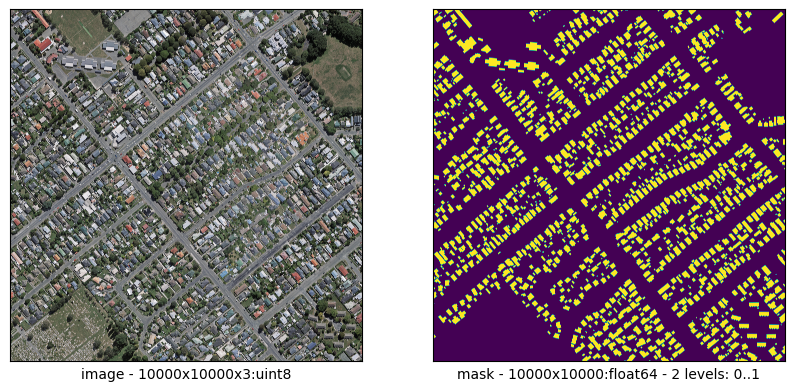

In [8]:
visualize(
    {
        "image": image,
        "mask": mask/np.max(mask),
    },
    in_notebook = True,
    description = [cache_object_name, f"#{index}: {record_id}"])

In [9]:
# END